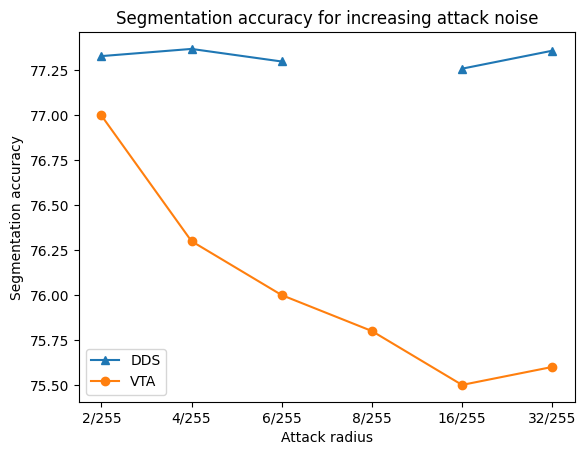

In [21]:
import numpy as np 
import matplotlib.pyplot as plt

x = ["2/255", "4/255", "6/255", "8/255", "16/255", "32/255"]
y1 = [77.33, 77.37, 77.30, None, 77.26, 77.36]
y2 = [77, 76.3, 76, 75.8, 75.5, 75.6]

plt.title("Segmentation accuracy for increasing attack noise")
plt.xlabel("Attack radius")
plt.ylabel("Segmentation accuracy")
plt.plot(x, y1, marker = "^")
plt.plot(x, y2, marker = "o")
plt.legend(["DDS", "VTA"])
plt.show()